# Initial Goals for Movie Analysis:
- Read through each database & determine useful data
- Decide on questions to dig deep on
- Prep for cleaning

In [102]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns
%matplotlib inline

In [420]:
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

In [6]:
#Many thanks to Steven--This takes all the zipfiles and stores them in one dataframe.

csv_files = glob('zippedData/*.csv.gz')
csv_dfs = [pd.read_csv(f) for f in csv_files]

In [7]:
df1=csv_dfs[0]
df2=csv_dfs[1]
df3=csv_dfs[2]
df4=csv_dfs[3]
df5=csv_dfs[4]
df6=csv_dfs[5]
df7=csv_dfs[6]
df8=csv_dfs[7]
df9=csv_dfs[8]

## BOM Gross $$
- Powerful List! Great way to start our analysis.
- Domestic Gross seems most relevant but will keep an eye on potential Studios to partner with/emulate?
- NOTE: The year is through 2018 & there are 1350 Null values in Foreign Film Gross (nearly 40%)

In [743]:
print(len(df1))
df1.head()

3356


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


##  IMDB Name Basics: Production Crew & What They Are Known For
- May be interesting to look at representation in the crew
- Perhaps measuring minority representation in crew with domestic Gross? Competent non-white non-cis-male production crew may lead to better returns? Would probably require more info than what we have here though.
- ***NOTE: 8% of primary_profession is null***

In [532]:
print(len(df2))
print(df2.primary_profession.isna().sum())
df2.head(30)


606648
51340


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"


## IMDB Title AKAs 
- Not much here for what we are trying to do. Just some alternative titles for films. 
- Leave alone for now

In [533]:
print(len(df3))
df3.head(30)

331703


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


## IMDB Title Basics
- VERY USEFUL! We can use this to map runtime_minutes vs. domestic_gross and layer genre atop it. 
- Would also be useful to see what genres have high gross but are not produced as much.
- Could be a pocket for Microsoft to jump in and take advantage.
- Netflix has mastered Reality TV. Perhaps we can do the same with a different genre? 

In [534]:
print (len(df4))
df4.head(30)

146144


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [780]:
df4.genres.value_counts(normalize=True)

Documentary                    0.228691
Drama                          0.152669
Comedy                         0.065207
Horror                         0.031065
Comedy,Drama                   0.025004
                                 ...   
Drama,Horror,War               0.000007
Animation,Horror,Sci-Fi        0.000007
Adventure,Comedy,Reality-TV    0.000007
Comedy,Horror,Reality-TV       0.000007
Comedy,Drama,Reality-TV        0.000007
Name: genres, Length: 1085, dtype: float64


## IMDB Crew
- Will have to match with information from IMDB Name Basics and IMDB Principals
- Can be useful if we want to look at whether to invest more in directors or writers. 

In [12]:
print(len(df5))
df5.head(30)

146144


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"


## IMDB Principals 
- **NOTE: Look into dropping job column--83% are NaNs and it seems redundant with category**
- May be useful when combined with IMDB Basics and Crew?

In [13]:
print(len(df6))
print(df6.job.isna().sum())
df6.head(30)

1028186
850502


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


## IMDB Ratings
- Could be interesting to correlate averagerating with gross using a floor of a certain number of votes to consider including the rating in our measurement.
- Would be good to see if rating matters in domestic gross and whether prestige filmmaking (defined as a film receiving a rating above 9.5?) is worth the investment.

In [14]:
print (len(df7))
df7.head(30)

73856


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


## The Movie Database Movies List
- 76 original languages listed! 
- English is nearly 88% of the original languages
- The second highest % is French at nearly 2%. 
- Unsure if there can be much significant data for films not in English since their percentage is so low.
- May be worth a look if time permits.
- **NOTE: The null value is 'xx'**

In [535]:
print(len(df8))
print(df8.original_language.nunique())
print (df8.original_language.value_counts(normalize=True))
df8.head(30)

26517
76
en    0.878342
fr    0.019120
es    0.017159
ru    0.011238
ja    0.009994
        ...   
sl    0.000038
hz    0.000038
dz    0.000038
af    0.000038
cr    0.000038
Name: original_language, Length: 76, dtype: float64


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


## The Movie Database Movie Budgets
- List is very pretty & clean but the gross datatypes are objects.
- Must change to Integers to look into NaN existence. 
- **Great source for $$ info!**

In [536]:
print(len(df9))
print(df9.worldwide_gross.dtype)
df9.head(10)

# Accidentally activated this cell at the end of the cleaning session
# So what you see below is the result of after the cleaning was finished

5782
int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,315.369636,95.640815
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225,571.016739,206.098766
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,9420425,221.140142,3.140142
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,-70975705,118.648403,-23.658568
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,-99925825,193.206974,-33.308608


# Time to Rename the Lists and Get to Work! 

## Rename the Lists:

In [537]:
bom_gross_df = df1
imdb_name_basics_df = df2
imdb_title_aka_df = df3
imdb_title_basics_df = df4
imdb_crew_df = df5
imdb_principals_df = df6
imdb_ratings_df = df7
tmdb_movie_list_df= df8
tmdb_budgets_df = df9

## Questions related to Today's Cleaning:
1. Is runtime a reliable predictor of profitability?
    - Shoutout to Steven who is handling the cleaning for this one!
2. Is genre a predictor of profitability? If so, is there a profitable genre that has a small market share that Microsoft can hone in on?
    - Databases needed for this:
        - bom_gross_df
        - imdb_title_basics_df
        - tmdb_movie_list_df
        - tmdb_budgets_df
    - **Will conduct a round 2 analysis to confirm which of these datasets work best for our problem**

### bom_gross_df: Will you [tentatively] accept this rose? 
- Will focus on domestic_gross here due to the NaNs in foreign_gross
- May run into an issue due to lack of production budget. 

In [538]:
bom_gross_df.head ()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [19]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### imdb_title_basics_df: Will you accept this rose?
- The genres will be prime for selection and matching with the domestic_gross above.
- May run into issues due to the difference in amount of data in these dataframes. Will watch out for those issues.

In [539]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [540]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### tmdb_movie_list_df: You are not the list we're looking for. Please pack your knives and leave.
 - It would be interesting to look at languages later on if time permits, though!

In [22]:
tmdb_movie_list_df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
tmdb_movie_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### tmdb_budgets_df: Condragulations, you're a winner, baby !
- I am a fan of the size of this df. Let's get to work on it.

In [541]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,315.369636,95.640815


In [542]:
tmdb_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
id                                 5782 non-null int64
release_date                       5782 non-null object
movie                              5782 non-null object
production_budget                  5782 non-null int64
domestic_gross                     5782 non-null int64
worldwide_gross                    5782 non-null int64
overall_worldwide_profitability    5782 non-null int64
overall_domestic_profitability     5782 non-null int64
worldwide_ROI                      5782 non-null float64
domestic_ROI                       5782 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 451.8+ KB


## Cleaning time at the Pet Shop!

In [26]:
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [27]:
bom_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
# Because domestic_gross has 28 NaNs, may replace with median. 
bom_gross_df.domestic_gross.mean()

28745845.06698422

In [29]:
bom_gross_df.domestic_gross.median()

1400000.0

In [30]:
bom_gross_df['domestic_gross'].fillna(bom_gross_df['domestic_gross'].median()).mean()

28519779.62208444

In [31]:
# After above analysis, replacing the NaNs with the median 
# may skew the data. 
# Let's drop the 28 NaN domestic_gross rows and the 5 NaN studio rows

In [32]:
bom_gross_df.dropna(subset = ['domestic_gross'], inplace=True)

In [33]:
bom_gross_df.domestic_gross.isna().sum()

0

In [34]:
bom_gross_df.domestic_gross.mean()
# The mean only changed by $20,000. 
# Would have changed by $200,000 if we replaced with median

28745845.06698422

In [35]:
bom_gross_df.median()
# Median has stayed the same.

domestic_gross    1400000.0
year                 2014.0
dtype: float64

In [36]:
bom_gross_df.dropna(subset = ['studio'], inplace = True)

In [37]:
bom_gross_df.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [38]:
bom_gross_df.drop(columns='foreign_gross', inplace=True)

In [39]:
bom_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [40]:
bom_gross_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


### bom_gross_df is clean! No more missing data. On to imdb_title_basics.

In [41]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### Let's go ahead and join the two tables and finish cleaning after

In [43]:
joined_df=bom_gross_df.join(imdb_title_basics_df.set_index('primary_title'), 
                            on=['title'], how='inner')
print(len(joined_df))

3341


In [44]:
joined_df.head()

,title,studio,domestic_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
3,Inception,WB,292600000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
6,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


In [45]:
joined_df.reset_index()

,index,title,studio,domestic_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,3,Inception,WB,292600000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,4,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,6,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3336,3379,Souvenir,Strand,11400.0,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance"
3337,3379,Souvenir,Strand,11400.0,2018,tt3478898,Souvenir,2014,86.0,Documentary
3338,3381,Beauty and the Dogs,Osci.,8900.0,2018,tt6776572,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller"
3339,3382,The Quake,Magn.,6200.0,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller"


### The join seems to be successful! Time for further cleaning.
- Let's start by renaming the join to one that sounds more specific to what we're doing!

In [46]:
joined_gross_genre_df=joined_df

In [47]:
# Let's check for dupes!

In [48]:
joined_gross_genre_df.duplicated().sum()

0

In [49]:
# No true dupes babyyyyyyy!

In [50]:
joined_gross_genre_df.isna().sum()

title                0
studio               0
domestic_gross       0
year                 0
tconst               0
original_title       0
start_year           0
runtime_minutes    167
genres              40
dtype: int64

In [51]:
# We will be deleting runtime column along with others that aren't relevant
# We will figure out what to do with the missing genre data soon

In [52]:
joined_gross_genre_df.drop(columns=['original_title', 'runtime_minutes'], 
                           inplace = True)

In [53]:
joined_gross_genre_df.drop(columns=['start_year'], inplace=True)

In [54]:
joined_gross_genre_df.set_index('tconst')

,title,studio,domestic_gross,year,genres
tconst,,,,,
tt0435761,Toy Story 3,BV,415000000.0,2010,"Adventure,Animation,Comedy"
tt1375666,Inception,WB,292600000.0,2010,"Action,Adventure,Sci-Fi"
tt0892791,Shrek Forever After,P/DW,238700000.0,2010,"Adventure,Animation,Comedy"
tt1325004,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,"Adventure,Drama,Fantasy"
tt1228705,Iron Man 2,Par.,312400000.0,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
tt2389092,Souvenir,Strand,11400.0,2018,"Comedy,Romance"
tt3478898,Souvenir,Strand,11400.0,2018,Documentary
tt6776572,Beauty and the Dogs,Osci.,8900.0,2018,"Crime,Drama,Thriller"


In [55]:
joined_gross_genre_df.title.duplicated().sum()

754

In [56]:
joined_gross_genre_df.isna().sum()

title              0
studio             0
domestic_gross     0
year               0
tconst             0
genres            40
dtype: int64

In [57]:
joined_gross_genre_df.shape

(3341, 6)

In [58]:
joined_gross_genre_df.dropna(subset = ['genres']).shape

(3301, 6)

## Revelation: bom_gross_df does not include production budget. 
- May not be valuable.
- Let's join & clean imdb_title_basics_df with tmdb_budgets

In [578]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,315.369636,95.640815


In [579]:
# Let's turn the production_budget,
# domestic_gross, and worldwide_gross columns into int64s by eliminating
# the $s and ,s 

def convert_amt_to_int64(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [64]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tmdb_budgets_df = convert_amt_to_int64(tmdb_budgets_df, col)

In [66]:
# Let's also add four extra columns--two for overall profitability worldwide 
# and domestic as well as two for ROI

In [141]:
tmdb_budgets_df['overall_worldwide_profitability'] = 
tmdb_budgets_df['worldwide_gross'] - tmdb_budgets_df['production_budget']
tmdb_budgets_df['overall_domestic_profitability'] = 
tmdb_budgets_df['domestic_gross'] - tmdb_budgets_df['production_budget']


In [143]:
tmdb_budgets_df.drop(columns='overall_profitability', inplace=True)

In [580]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,315.369636,95.640815


In [152]:
tmdb_budgets_df['worldwide_ROI'] = 
(tmdb_budgets_df['overall_worldwide_profitability'] / tmdb_budgets_df['production_budget']) * 100
tmdb_budgets_df['domestic_ROI'] = 
(tmdb_budgets_df['overall_domestic_profitability'] / tmdb_budgets_df['production_budget']) * 100

In [153]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,315.369636,95.640815


In [148]:
tmdb_budgets_df.drop(columns='ROI', inplace=True)

In [493]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382,315.369636,95.640815


In [581]:
join_df=tmdb_budgets_df.join(imdb_title_basics_df.set_index('primary_title'), 
                             on=['movie'], how='inner')
print(len(joined_df))

3743


In [582]:
join_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,tt1775309,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,68,"Jul 6, 2001",Cure,10000,94596,94596,84596,84596,845.960000,845.960000,tt5936960,Cure,2014,NaN,NaN
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-9473,-94.730000,-94.730000,tt6616538,Bang,2015,NaN,NaN
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,-4416,-49.066667,-49.066667,tt1880418,Newlyweds,2011,95.0,"Comedy,Drama"
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,-100.000000,-100.000000,tt7837402,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [252]:
# Check for Missing Values

In [583]:
join_df.isna().sum()

id                                   0
release_date                         0
movie                                0
production_budget                    0
domestic_gross                       0
worldwide_gross                      0
overall_worldwide_profitability      0
overall_domestic_profitability       0
worldwide_ROI                        0
domestic_ROI                         0
tconst                               0
original_title                       1
start_year                           0
runtime_minutes                    487
genres                              72
dtype: int64

In [254]:
# Drop Columns that are unnecessary to genre & profitability

In [584]:
join_df.drop(columns=['original_title', 'runtime_minutes'], inplace = True)

In [585]:
join_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,tconst,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,tt1775309,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,tt1298650,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,tt6565702,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,tt2395427,2015,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,tt4154756,2018,"Action,Adventure,Sci-Fi"


In [586]:
join_df.isna().sum()
# Check for further Null Values

id                                  0
release_date                        0
movie                               0
production_budget                   0
domestic_gross                      0
worldwide_gross                     0
overall_worldwide_profitability     0
overall_domestic_profitability      0
worldwide_ROI                       0
domestic_ROI                        0
tconst                              0
start_year                          0
genres                             72
dtype: int64

In [587]:
join_df.shape

(3815, 13)

In [588]:
# Drop the genre NaN rows. They are 1% of the entire DataFrame

In [589]:
join_df.dropna(subset = ['genres']).shape

(3743, 13)

In [590]:
join_df.dropna(subset = ['genres'], inplace=True)

In [591]:
join_df.isna().sum()

id                                 0
release_date                       0
movie                              0
production_budget                  0
domestic_gross                     0
worldwide_gross                    0
overall_worldwide_profitability    0
overall_domestic_profitability     0
worldwide_ROI                      0
domestic_ROI                       0
tconst                             0
start_year                         0
genres                             0
dtype: int64

In [593]:
join_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,tconst,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,tt1775309,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,tt1298650,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,tt6565702,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,tt2395427,2015,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,tt4154756,2018,"Action,Adventure,Sci-Fi"


In [778]:
type(join_df.start_year)

pandas.core.series.Series

In [595]:
join_df.drop(columns=['tconst'], inplace = True)

# Before we move forward, let's drop tconst

In [596]:
# Time to separate the genres 

In [597]:
# Will seperate out genre
# After that, will find most profitable and least used genre later after the
# other cleaning is finished.

In [598]:
# Access the 'genres' column and use a lambda function to create a list in each
# cell that seperates each genre from one another
# This is helpful for those rows where the film has multiple genres
join_df['genres'] = join_df['genres'].apply(lambda x: x.split(",") if x else x)
join_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,2011,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,2011,"[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,2019,"[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,2015,"[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,2018,"[Action, Adventure, Sci-Fi]"


In [599]:
# Create a sequence of iterable elements called all_genres, 
# no duplicates allowed
all_genres = set()
for genres in join_df['genres']:
    if genres:
        all_genres.update(genres)

In [600]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [711]:
# len(all_genres)

23

In [602]:
# For all genres we have, add zero unless the film is of that genre
# In which case add 1

for genre in all_genres:
    join_df[genre] = np.zeros(shape=join_df.shape[0])

In [603]:
# genre is one if the film is of that genre

for index, row in join_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            join_df.loc[index, genre] = 1

join_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,...,Mystery,Horror,Animation,History,Comedy,Romance,Sci-Fi,Western,Family,Sport
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [633]:
join_df_modified = join_df.drop(columns = 'genres')


In [634]:
join_df_modified.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,...,Mystery,Horror,Animation,History,Comedy,Romance,Sci-Fi,Western,Family,Sport
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [769]:
join_df_modified.to_csv(r'zippedData/join_df_modified.csv')

## We now have successfully separated all genres into individual columns
- Now to plot their Worldwide ROI!

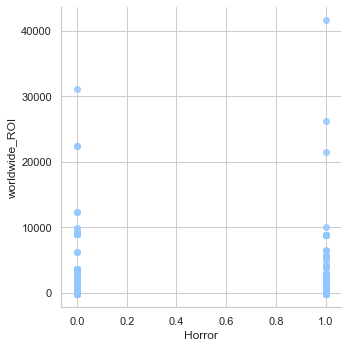

In [635]:
sns.lmplot(x='Horror', y='worldwide_ROI', data=join_df_modified, fit_reg=False,)

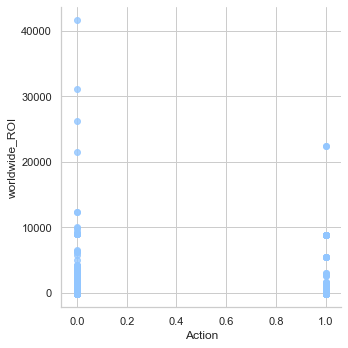

In [636]:
sns.lmplot(x='Action', y='worldwide_ROI', data=join_df_modified, fit_reg=False,)

In [ ]:
# It may be best to filter the table such that we create a seperate column only for each genre's 1 values
# Then we can concatenate or maybe stack these dfs together and operate from there

In [705]:
f1 = join_df_modified['Horror']==1.0

In [668]:
f2 = join_df_modified['Action']==1.0

In [669]:
f3 = join_df_modified['Adventure']==1.0

In [672]:
f4 = join_df_modified['Animation']==1.0
f5 = join_df_modified['Romance']==1.0
f6 = join_df_modified['Biography']==1.0
f7 = join_df_modified['Crime']==1.0
f8 = join_df_modified['Comedy']==1.0
f9 = join_df_modified['Drama']==1.0
f10 = join_df_modified['Documentary']==1.0
f11 = join_df_modified['Family']==1.0
f12 = join_df_modified['Fantasy']==1.0
f13 = join_df_modified['History']==1.0
f14 = join_df_modified['Music']==1.0
f15= join_df_modified['Musical']==1.0
f16 = join_df_modified['Mystery']==1.0
f17 = join_df_modified['News']==1.0
f18 = join_df_modified['Reality-TV']==1.0
f19 = join_df_modified['Sci-Fi']==1.0
f20 = join_df_modified['Thriller']==1.0
f21 = join_df_modified['Sport']==1.0
f22 = join_df_modified['Western']==1.0
f23 = join_df_modified['War']==1.0

In [640]:
horror_df = join_df_modified[f1]

In [749]:
new_horror_df = horror_df.stack()

In [673]:
action_df = join_df_modified[f2]
adventure_df = join_df_modified[f3]
animation_df = join_df_modified[f4]
romance_df = join_df_modified[f5]
biography_df = join_df_modified [f6]
crime_df = join_df_modified [f7]
comedy_df = join_df_modified [f8]
drama_df = join_df_modified [f9]
doc_df = join_df_modified[f10]
fam_df = join_df_modified[f11]
fantasy_df= join_df_modified[f12]
history_df = join_df_modified[f13]
music_df = join_df_modified[f14]
musical_df = join_df_modified[f15]
mystery_df = join_df_modified[f16]
news_df = join_df_modified[f17]
realityTv_df = join_df_modified[f18]
sciFi_df = join_df_modified[f19]
thriller_df = join_df_modified[f20]
sport_df = join_df_modified[f21]
western_df = join_df_modified[f22]
war_df = join_df_modified[f23]

## Bad news, tumbleweed, this is not the way.
- Try again!
- This time, maybe try using a dictionary. Also you should initially grab the counts of every genre.
    - You will want to only be measuring the ROI of films that hold more than 5% and less than 20% of the market share, as told by these tables.

In [786]:
# Check the counts for those genres

for col in join_df_modified:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{join_df_modified[col].value_counts()}')

Viewing values in col: id
Top 5 values:
43    68
69    62
44    61
56    59
63    59
      ..
40    23
46    23
21    23
61    21
75    18
Name: id, Length: 100, dtype: int64
Viewing values in col: release_date
Top 5 values:
Mar 27, 2015    27
Feb 6, 2004     24
Apr 23, 2009    24
Jun 5, 2009     24
Dec 31, 2014    23
                ..
Jul 17, 2012     1
Oct 19, 2007     1
Jul 7, 2015      1
Mar 19, 1999     1
Oct 6, 2015      1
Name: release_date, Length: 1152, dtype: int64
Viewing values in col: movie
Top 5 values:
Home                    72
Brothers                26
The Gift                26
The Return              19
Hamlet                  16
                        ..
August: Osage County     1
Open Road                1
Before Midnight          1
The Gatekeepers          1
Shine                    1
Name: movie, Length: 2299, dtype: int64
Viewing values in col: production_budget
Top 5 values:
10000000     134
20000000     133
5000000      124
15000000     119
25000000     115

In [787]:
Make a list of the genres

cols = list(join_df.columns)

In [792]:
genre_cols = cols[12:]

In [812]:
# Create a dictionary where the genre is the key and the count is the value

genre_count = {}
for col in genre_cols:
    count = np.sum(join_df_modified[col] == 1).sum() 
    genre_count[col] = count

In [813]:
genre_count

{'Crime': 722,
 'Documentary': 1160,
 'Adventure': 831,
 'Musical': 92,
 'Music': 171,
 'Thriller': 1223,
 'War': 213,
 'Drama': 2526,
 'Reality-TV': 4,
 'News': 30,
 'Action': 1230,
 'Fantasy': 340,
 'Biography': 569,
 'Mystery': 540,
 'Horror': 875,
 'Animation': 314,
 'History': 287,
 'Comedy': 1389,
 'Romance': 760,
 'Sci-Fi': 395,
 'Western': 75,
 'Family': 507,
 'Sport': 181}

In [807]:
# Sort these values to get a better look at them and understand
# Which values have the highest market share

In [814]:
new_list=sorted(genre_count.items())
new_list

[('Action', 1230),
 ('Adventure', 831),
 ('Animation', 314),
 ('Biography', 569),
 ('Comedy', 1389),
 ('Crime', 722),
 ('Documentary', 1160),
 ('Drama', 2526),
 ('Family', 507),
 ('Fantasy', 340),
 ('History', 287),
 ('Horror', 875),
 ('Music', 171),
 ('Musical', 92),
 ('Mystery', 540),
 ('News', 30),
 ('Reality-TV', 4),
 ('Romance', 760),
 ('Sci-Fi', 395),
 ('Sport', 181),
 ('Thriller', 1223),
 ('War', 213),
 ('Western', 75)]

In [815]:
# Don't sort it alphabetically! Sort by value.

In [853]:
list_in_order={k: v for k, v in sorted(genre_count.items(), 
                                       key=lambda item: item[1])}


In [871]:
list_in_order

{'Reality-TV': 4,
 'News': 30,
 'Western': 75,
 'Musical': 92,
 'Music': 171,
 'Sport': 181,
 'War': 213,
 'History': 287,
 'Animation': 314,
 'Fantasy': 340,
 'Sci-Fi': 395,
 'Family': 507,
 'Mystery': 540,
 'Biography': 569,
 'Crime': 722,
 'Romance': 760,
 'Adventure': 831,
 'Horror': 875,
 'Documentary': 1160,
 'Thriller': 1223,
 'Action': 1230,
 'Comedy': 1389,
 'Drama': 2526}

In [854]:
keys = list(list_in_order.keys())
values = list(list_in_order.values())

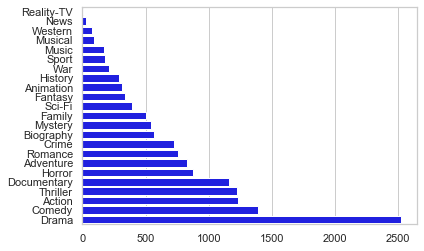

In [870]:
sns.barplot(y = keys, x = values, color='blue')

In [742]:
# Let's look at films that bring in 2 and 6% of the market share
# Ignore the films where the count is over 1000 or less than 300
# Ignore Drama, Comedy, Action, Thriller, Documentary

In [835]:
# Create a list of genres that bring in 2 and 6% of the market share
# Create a dictionary and then use a for loop to iterate through the rows
# Of those genres and then create a dataframe that pulls the genre and its
# Corresponding ROI together 

genres = ["Animation", "Fantasy", "Sci-Fi", "Family", "Mystery", "Biography", 
          "Crime", "Romance", "Adventure", "Horror"]
dic = {}
dic["genres"] = []
dic["roi"] = []
for index, row in genre_ROI_df.iterrows():
    for i in genres:
        if row[i] == 1:
            dic["genres"].append(i)
            dic["roi"].append(row['worldwide_ROI'])

In [873]:
df1 = pd.DataFrame(dic)

df1.head()

,genres,roi
0,Horror,553.257713
1,Fantasy,154.667286
2,Adventure,154.667286
3,Sci-Fi,-57.210757
4,Adventure,-57.210757


In [874]:
print (df1)

         genres          roi
0        Horror   553.257713
1       Fantasy   154.667286
2     Adventure   154.667286
3        Sci-Fi   -57.210757
4     Adventure   -57.210757
...         ...          ...
5848     Horror  -100.000000
5849     Horror  1287.110000
5850     Sci-Fi  -100.000000
5851     Horror  -100.000000
5852     Horror  -100.000000

[5853 rows x 2 columns]


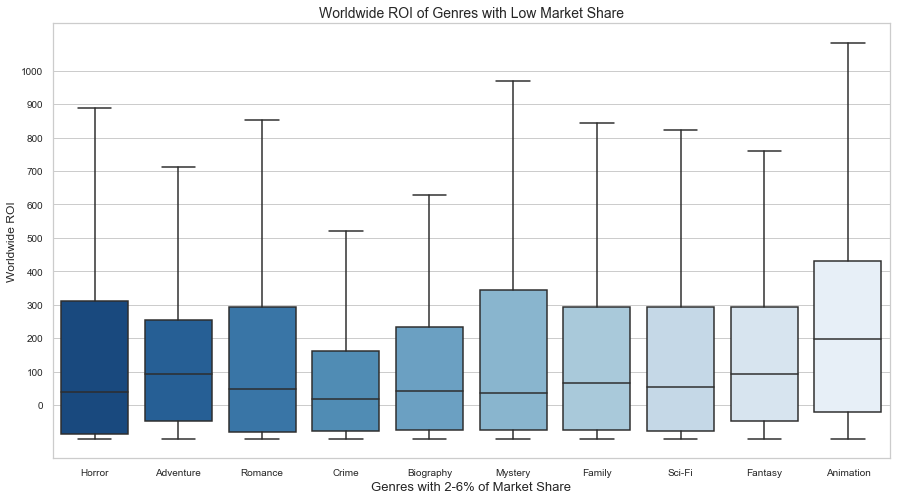

In [845]:
# Create a boxplot with all genres with 2-6% of the market share and the ROI

plt.figure(figsize=(15,8))
b=sns.boxplot(data=df1, x='genres', y='roi', showfliers=False, 
              order=['Horror', 'Adventure','Romance','Crime','Biography', 
                     'Mystery', 'Family', 'Sci-Fi', 'Fantasy', 'Animation'],
              palette="Blues_r")

# Set labels for plot
b.axes.set_title("Worldwide ROI of Genres with Low Market Share",fontsize=14)
b.set_xlabel("Genres with 2-6% of Market Share",fontsize=13)
b.set_ylabel("Worldwide ROI",fontsize=12)
b.tick_params(labelsize=10)
yticks = np.linspace(start=0, stop=100*10, num=11)
plt.yticks(yticks)

plt.show()

In [846]:
# Which of the above are RELEVANT? 
# Those with Median ROI over 100 --> Adventure, Fantasy, Animation
# On to the official/clean plot notebook!